# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take a dataframe series and a degree and return a dataframe where each column is the series to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the feature column 2 is the feature squared and column 3 is the feature cubed
* Use matplotlib/seaborn to visualise polynomial regressions
* Use matplotlib/seaborn to visualise the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

**Load libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

Next we're going to write a polynomial function that takes an pandas series and a maximal degree and returns a dataframe with columns containing the series to all the powers up to the maximal degree.

The easiest way to apply a power to a series is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third power we can do as follows:

In [3]:
tmp = pd.Series([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print(tmp)
print(tmp_cubed)

0    1.0
1    2.0
2    3.0
dtype: float64
0     1.0
1     8.0
2    27.0
dtype: float64


We can create an empty datafrane using pd.DataFrame() and then add any columns to it with ex_df['column_name'] = value. For example we create an empty dataframe and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [5]:
ex_df = pd.DataFrame()
ex_df['power_1'] = tmp
print(ex_df)

   power_1
0      1.0
1      2.0
2      3.0


**Polynomial dataframe function**

Complete the following function to create a dataframe consisting of the powers of a series up to a specific degree:

In [8]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree <= 1
    # initialise the dataframe:
    poly_dataframe = pd.DataFrame()
    # set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # check if degree > 1
    if degree > 1:
        # loop over the remaining degrees
        for power in range(2, degree+1):
            # give the column a name
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power
            poly_dataframe[name] = feature.apply(lambda x: x**power)
            
    return poly_dataframe

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [9]:
polynomial_dataframe(tmp, 3)

,power_1,power_2,power_3
0,1.0,1.0,1.0
1,2.0,4.0,8.0
2,3.0,9.0,27.0


**Visualising polynomial regression**

Let's use matplotlib/seaborn to visualize what a polynomial regression looks like on some real data.

In [11]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  object 
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [14]:
sales = sales.sort_values(by=['sqft_living', 'price'])

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [16]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [20]:
model1 = smf.ols('price ~ power_1', data = poly1_data).fit()
print(model1.params)

Intercept   -43580.743094
power_1        280.623568
dtype: float64


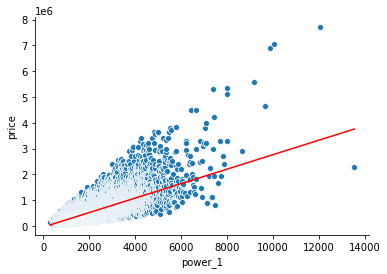

In [21]:
preds = model1.predict(poly1_data)

sns.scatterplot(data = poly1_data, x = "power_1", y = "price")
sns.lineplot(data = poly1_data, x = "power_1", y = preds, color = "red")
sns.despine();

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43580. What if we wanted to plot a second degree polynomial?

In [25]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = smf.ols('price ~ power_1 + power_2', data = poly2_data).fit()
print(model2.params)

Intercept    199222.279306
power_1          67.994095
power_2           0.038581
dtype: float64


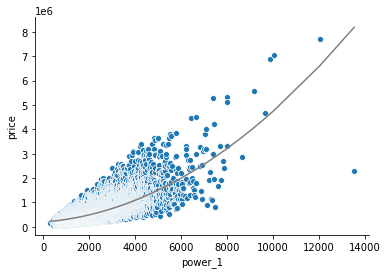

In [26]:
preds = model2.predict(poly2_data)

sns.scatterplot(data = poly2_data, x = "power_1", y = "price")
sns.lineplot(data = poly2_data, x = "power_1", y = preds, color = "gray")
sns.despine();

The resulting model looks like half a parabola. See what the cubic looks like:

In [30]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']
model3 = smf.ols('price ~ power_1 + power_2 + power_3', data = poly3_data).fit()
print(model3.params)

Intercept    336819.747643
power_1         -90.181986
power_2           0.087047
power_3          -0.000004
dtype: float64


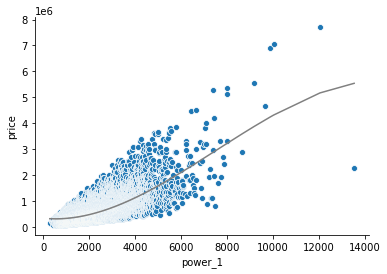

In [31]:
preds = model3.predict(poly3_data)

sns.scatterplot(data = poly3_data, x = "power_1", y = "price")
sns.lineplot(data = poly3_data, x = "power_1", y = preds, color = "gray")
sns.despine();

Now try a 15th degree polynomial:

In [35]:
poly5_data = polynomial_dataframe(sales['sqft_living'], 5)
poly5_data['price'] = sales['price']
model5 = smf.ols('price ~ power_1 + power_2 + power_3 + power_4 + power_5', data = poly5_data).fit()
print(model5.params)

Intercept    1.678954e-07
power_1      2.500256e-04
power_2      2.475963e-01
power_3     -8.171744e-05
power_4      1.095510e-08
power_5     -4.586904e-13
dtype: float64


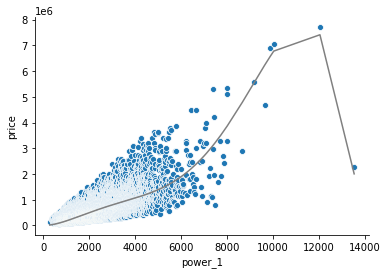

In [36]:
preds = model5.predict(poly5_data)

sns.scatterplot(data = poly5_data, x = "power_1", y = "price")
sns.lineplot(data = poly5_data, x = "power_1", y = preds, color = "gray")
sns.despine();

In [37]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']
model15 = smf.ols('price ~ power_1 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9 + \
                  power_10 + power_11 + power_12 + power_13 + power_14 + power_15', data = poly15_data).fit()
print(model15.params)

Intercept    8.759922e-95
power_1     -2.533015e-50
power_2     -2.834220e-56
power_3      4.385334e-91
power_4      7.475987e-78
power_5      3.650254e-75
power_6      3.111349e-71
power_7      2.617117e-67
power_8      2.150226e-63
power_9      1.701458e-59
power_10     1.269084e-55
power_11     8.594898e-52
power_12     4.889655e-48
power_13     1.868057e-44
power_14    -2.886142e-48
power_15     1.112867e-52
dtype: float64


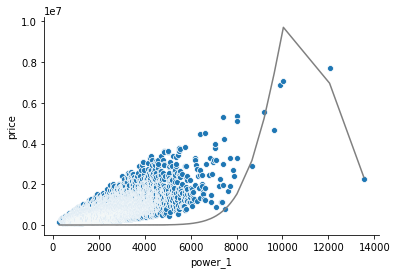

In [38]:
preds = model15.predict(poly15_data)

sns.scatterplot(data = poly15_data, x = "power_1", y = "price")
sns.lineplot(data = poly15_data, x = "power_1", y = preds, color = "gray")
sns.despine();

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

**Change the data and re-train**

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [40]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
print(set_1.shape)
print(set_2.shape)
print(set_3.shape)
print(set_4.shape)

(5404, 21)
(5398, 21)
(5409, 21)
(5402, 21)


Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

Intercept    6.998479e-94
power_1     -7.307855e-49
power_2      1.278641e-55
power_3      4.958728e-60
power_4      1.643710e-77
power_5      1.784686e-74
power_6      1.366532e-70
power_7      1.035548e-66
power_8      7.699040e-63
power_9      5.543921e-59
power_10     3.787194e-55
power_11     2.365357e-51
power_12     1.249831e-47
power_13     4.466425e-44
power_14    -6.956928e-48
power_15     2.702043e-52
dtype: float64


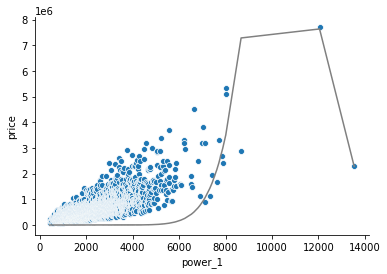

In [45]:
poly15_data = polynomial_dataframe(set_1['sqft_living'], 15)
poly15_data['price'] = set_1['price']
model15 = smf.ols('price ~ power_1 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9 + \
                  power_10 + power_11 + power_12 + power_13 + power_14 + power_15', data = poly15_data).fit()
print(model15.params)

preds = model15.predict(poly15_data)

sns.scatterplot(data = poly15_data, x = "power_1", y = "price")
sns.lineplot(data = poly15_data, x = "power_1", y = preds, color = "gray")
sns.despine();

Intercept    3.517945e-90
power_1     -3.202775e-48
power_2     -4.720879e-54
power_3      1.939199e-87
power_4      1.777725e-74
power_5      1.611527e-71
power_6      8.767063e-68
power_7      4.710594e-64
power_8      2.476073e-60
power_9      1.256132e-56
power_10     6.021428e-53
power_11     2.627828e-49
power_12     9.660086e-46
power_13     2.391397e-42
power_14    -5.717156e-46
power_15     3.390889e-50
dtype: float64


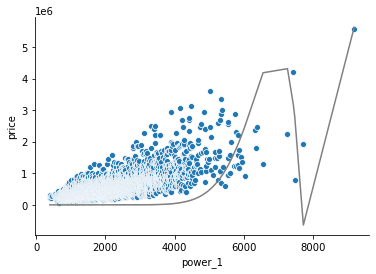

In [46]:
poly15_data = polynomial_dataframe(set_2['sqft_living'], 15)
poly15_data['price'] = set_2['price']
model152 = smf.ols('price ~ power_1 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9 + \
                  power_10 + power_11 + power_12 + power_13 + power_14 + power_15', data = poly15_data).fit()
print(model152.params)

preds = model152.predict(poly15_data)

sns.scatterplot(data = poly15_data, x = "power_1", y = "price")
sns.lineplot(data = poly15_data, x = "power_1", y = preds, color = "gray")
sns.despine();

Intercept    9.177576e-92
power_1     -4.937285e-49
power_2      1.718357e-54
power_3      4.924842e-59
power_4      9.719542e-76
power_5      9.505716e-73
power_6      5.735295e-69
power_7      3.580264e-65
power_8      2.185417e-61
power_9      1.287004e-57
power_10     7.159580e-54
power_11     3.624982e-50
power_12     1.545534e-46
power_13     4.435903e-43
power_14    -8.990862e-47
power_15     4.562005e-51
dtype: float64


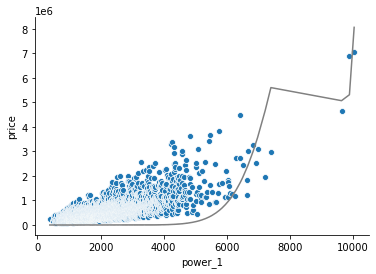

In [47]:
poly15_data = polynomial_dataframe(set_3['sqft_living'], 15)
poly15_data['price'] = set_3['price']
model15 = smf.ols('price ~ power_1 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9 + \
                  power_10 + power_11 + power_12 + power_13 + power_14 + power_15', data = poly15_data).fit()
print(model15.params)

preds = model15.predict(poly15_data)

sns.scatterplot(data = poly15_data, x = "power_1", y = "price")
sns.lineplot(data = poly15_data, x = "power_1", y = preds, color = "gray")
sns.despine();

Intercept    9.177576e-92
power_1     -4.937285e-49
power_2      1.718357e-54
power_3      4.924842e-59
power_4      9.719542e-76
power_5      9.505716e-73
power_6      5.735295e-69
power_7      3.580264e-65
power_8      2.185417e-61
power_9      1.287004e-57
power_10     7.159580e-54
power_11     3.624982e-50
power_12     1.545534e-46
power_13     4.435903e-43
power_14    -8.990862e-47
power_15     4.562005e-51
dtype: float64


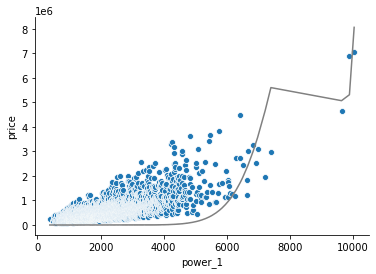

In [48]:
poly15_data = polynomial_dataframe(set_3['sqft_living'], 15)
poly15_data['price'] = set_3['price']
model15 = smf.ols('price ~ power_1 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9 + \
                  power_10 + power_11 + power_12 + power_13 + power_14 + power_15', data = poly15_data).fit()
print(model15.params)

preds = model15.predict(poly15_data)

sns.scatterplot(data = poly15_data, x = "power_1", y = "price")
sns.lineplot(data = poly15_data, x = "power_1", y = preds, color = "gray")
sns.despine();

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**
Yes

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**
No

**Selecting a polynomial degree**

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: the validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set:

In [50]:
training = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
testing = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
print(training.shape)
print(validation.shape)
print(testing.shape)

(9761, 21)
(9635, 21)
(2217, 21)


Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an dataframe of polynomial data of training['sqft_living'] at the current degree
    * Add training['price'] to the polynomial dataframe
    * Fit a polynomial regression model to sqft vs price with that degree on the training data
    * Compute the RSS on the validation data (here you will want to use .predict()) for that degree and you will need to make a polynmial dataframe
        using the validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

In [52]:
RSS_list = []

for degree in range(1, 15+1):
    X = polynomial_dataframe(training['sqft_living'], degree)
    X = sm.add_constant(X)
    Y = training['price']
    
    model = sm.OLS(Y, X).fit()
    
    X_valid = polynomial_dataframe(validation['sqft_living'], degree)
    X_valid = sm.add_constant(X_valid)
    preds = model.predict(X_valid)
    RSS = ((validation['price'] - preds)**2).sum()
    
    RSS_list.append((degree, RSS))

RSS_df = pd.DataFrame(RSS_list, columns=['degree', 'valid_RSS']).sort_values(by='valid_RSS')
RSS_df

,degree,valid_RSS
3,4,6.077345e+14
1,2,6.239551e+14
2,3,6.258203e+14
0,1,6.290979e+14
4,5,6.350938e+14
5,6,1.777692e+15
6,7,1.007432e+16
7,8,4.850743e+16
10,11,2.106429e+17
8,9,2.183489e+17


**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?** 4

Now that you have chosen the degree of your polynomial using the validation data, compute the RSS of this model on the test data. Report the RSS on your quiz.

In [54]:
degree = 4
X = polynomial_dataframe(training['sqft_living'], degree)
X = sm.add_constant(X)
Y = training['price']

model = sm.OLS(Y, X).fit()

X_test = polynomial_dataframe(testing['sqft_living'], degree)
X_test = sm.add_constant(X_test)
preds = model.predict(X_test)
RSS = ((testing['price'] - preds)**2).sum()
RSS

138941857926977.1

**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?** See above.